## Pest-Classification
### Dataset Link : https://drive.google.com/drive/folders/1qZAu-Mt7-X5I7Oqv5dJpHQk-NP5L80co?usp=drive_link
### No of Species : 4
#### Species categories : ['Potosiabre vitarsis', 'Thrips', 'Xylotrechus', 'army worm']

##### Importing Libraries

In [116]:
import tensorflow as tf
from tensorflow.keras import models, layers

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout,Conv2D,MaxPooling2D

In [117]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [118]:
BATCH_SIZE = 128
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30

In [119]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Pest_Dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2007 files belonging to 4 classes.


In [120]:
class_names = dataset.class_names
class_names

['Potosiabre vitarsis', 'Thrips', 'Xylotrechus', 'army worm']

In [121]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(128, 256, 256, 3)
[3 3 1 1 1 3 0 0 0 2 0 0 3 1 3 1 3 2 2 2 3 1 0 1 3 1 1 2 3 1 1 0 1 0 2 0 3
 3 3 3 1 3 3 0 1 3 1 1 1 2 3 0 0 2 3 0 0 3 3 2 0 3 3 3 0 3 2 1 2 0 3 3 3 2
 1 3 3 0 0 1 0 1 0 1 2 1 2 0 1 3 1 2 3 2 3 2 2 3 3 2 2 3 0 0 2 1 2 0 3 2 0
 2 1 2 0 0 1 3 3 3 2 0 0 0 1 1 0 2]


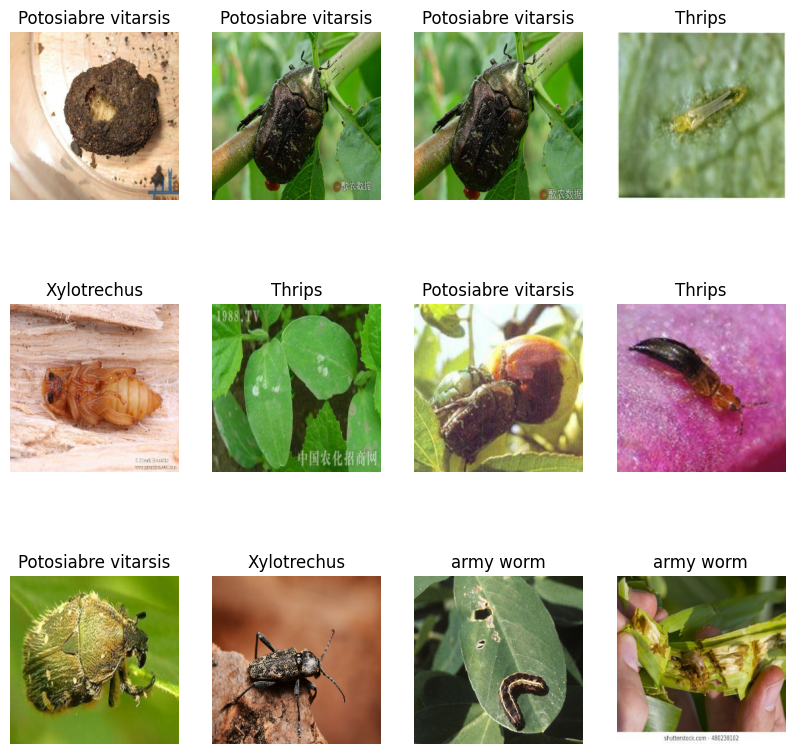

In [122]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [123]:
len(dataset)

16

In [124]:
train_size = 0.8
len(dataset)*train_size

12.8

In [125]:
train_ds = dataset.take(12)
len(train_ds)

12

In [126]:
test_ds = dataset.skip(12)
len(test_ds)

4

In [127]:
val_size=0.1
len(dataset)*val_size

1.6

In [128]:
val_ds = test_ds.take(2)
len(val_ds)

2

In [129]:
test_ds = test_ds.skip(2)
len(test_ds)

2

In [130]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [131]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [132]:
len(train_ds)

12

In [133]:
len(val_ds)

1

In [134]:
len(test_ds)

3

In [135]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [139]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = Sequential()
layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
layers.experimental.preprocessing.Rescaling(1./255),
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))
     

In [141]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 127, 127, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                      

In [142]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [143]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/30
12/12 [==============================] - 48s 3s/step - loss: 12.6591 - accuracy: 0.2734 - val_loss: 2.2938 - val_accuracy: 0.2812
Epoch 2/30
12/12 [==============================] - 24s 2s/step - loss: 1.3709 - accuracy: 0.3060 - val_loss: 1.3696 - val_accuracy: 0.2891
Epoch 3/30
12/12 [==============================] - 24s 2s/step - loss: 1.3548 - accuracy: 0.3750 - val_loss: 1.3595 - val_accuracy: 0.3281
Epoch 4/30
12/12 [==============================] - 19s 2s/step - loss: 1.3405 - accuracy: 0.4167 - val_loss: 1.3513 - val_accuracy: 0.3281
Epoch 5/30
12/12 [==============================] - 22s 2s/step - loss: 1.3044 - accuracy: 0.4661 - val_loss: 1.3449 - val_accuracy: 0.3281
Epoch 6/30
12/12 [==============================] - 21s 2s/step - loss: 1.2219 - accuracy: 0.5130 - val_loss: 1.4750 - val_accuracy: 0.3281
Epoch 7/30
12/12 [==============================] - 22s 2s/step - loss: 1.0379 - accuracy: 0.6035 - val_loss: 1.0505 - val_accuracy: 0.4922
Epoch 8/30
12/12 [=

In [153]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 1s 228ms/step - loss: 0.5020 - accuracy: 0.9036


In [154]:
scores

[0.5020266771316528, 0.9036458134651184]

In [155]:
history

In [156]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 12}

In [157]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [158]:
type(history.history['loss'])


list

In [159]:
len(history.history['loss'])

30

In [160]:
history.history['loss'][:5]

[12.659062385559082,
 1.3708568811416626,
 1.3547958135604858,
 1.340517520904541,
 1.3044028282165527]

In [161]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

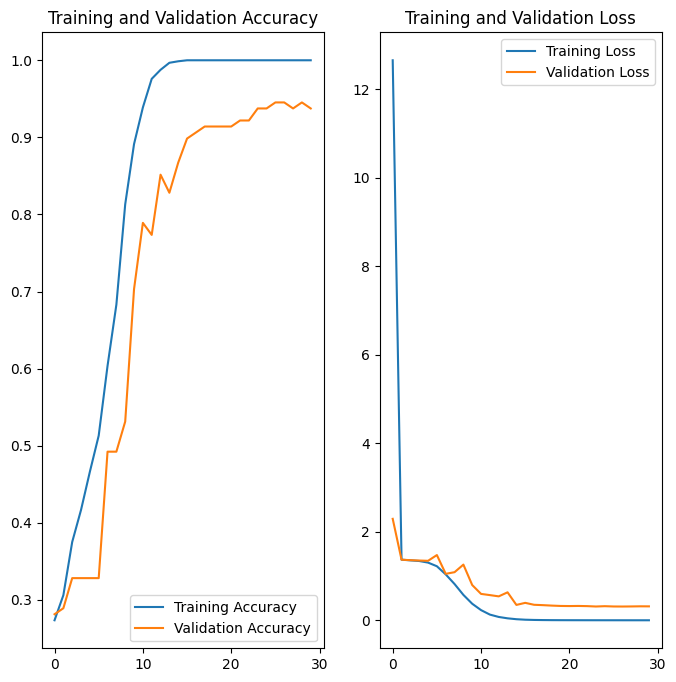

In [162]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potosiabre vitarsis
4/4 [==============================] - 0s 65ms/step
64


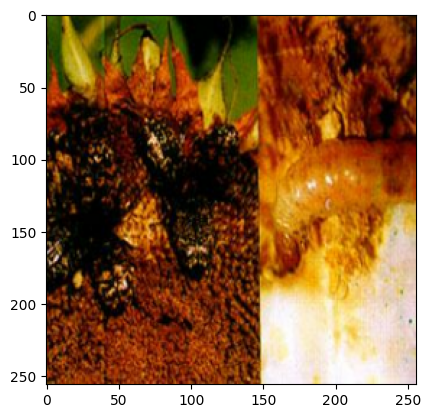

In [183]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
#     batch_prediction = model.predict(images_batch)
#     print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    predictions = model.predict(images_batch)
    print(np.argmax(predictions))
    

    #predicted_class = class_names[np.argmax(predictions)]

In [1]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    #img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions)]
    confidence = round(100 * (np.max(predictions)), 2)
    return predicted_class, confidence

In [2]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

NameError: name 'plt' is not defined

In [1]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"../models/{model_version}")

NameError: name 'model' is not defined

In [169]:
model.save("../my_model_final.h5")

C:\Users\Yash lichade\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
